# Introduction to Statistics in Python

> Statistics is the study of how to collect, analyze, and draw conclusions from data. It’s a hugely valuable tool that you can use to bring the future into focus and infer the answer to tons of questions.

- toc: true
- branch: master
- badges: true
- comments: true
- author: Datacamp
- categories: [Python, Data Visualization, EDA, Time Series, Machine Learning, scikit-learn, Regression, classification, Tempogram, Spectrogram, Cross-valiation, Stationarity]
- image: images/stats_intro.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2


[**Download Datasets and Presentation slides for this post HERE**](https://github.com/anhhaibkhn/Data-Science-selfstudy-notes-Blog/tree/master/_notebooks/Introduction%20to%20Statistics%20in%20Python)

> Statistics is the study of how to collect, analyze, and draw conclusions from data. It’s a hugely valuable tool that you can use to bring the future into focus and infer the answer to tons of questions. For example, what is the likelihood of someone purchasing your product, how many calls will your support team receive, and how many jeans sizes should you manufacture to fit 95% of the population? In this course, you'll discover how to answer questions like these as you grow your statistical skills and learn how to calculate averages, use scatterplots to show the relationship between numeric values, and calculate correlation. You'll also tackle probability, the backbone of statistical reasoning, and learn how to use Python to conduct a well-designed study to draw your own conclusions from data.

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl 


plt.rcParams['figure.figsize'] = [7, 5]

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore")

In [7]:
mpl.rcParams['axes.grid'] = True
plt.style.use('seaborn')

## Summary Statistics

> Summary statistics gives you the tools you need to boil down massive datasets to reveal the highlights. In this chapter, you'll explore summary statistics including mean, median, and standard deviation, and learn how to accurately interpret them. You'll also develop your critical thinking skills, allowing you to choose the best summary statistics for your data.

### What is statistics?

> **Descriptive and inferential statistics**

Statistics can be used to answer lots of different types of questions, but being able to identify which type of statistics is needed is essential to drawing accurate conclusions. In this exercise, you'll sharpen your skills by identifying which type is needed to answer each question.

Identify which questions can be answered with descriptive statistics and which questions can be answered with inferential statistics.

![](./images/infer_desc.png)

> **Data type classification**

In the video, you learned about two main types of data: numeric and categorical. Numeric variables can be classified as either discrete or continuous, and categorical variables can be classified as either nominal or ordinal. These characteristics of a variable determine which ways of summarizing your data will work best.

Map each variable to its data type by dragging each item and dropping it into the correct data type.

![](./images/infer_desc2.png)

### Measures of center

> **Mean and median**

In this chapter, you'll be working with the 2018 Food Carbon Footprint Index from nu3. The food_consumption dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your pandas and numpy skills.

pandas is imported as pd for you and food_consumption is pre-loaded.

Instruction: <br>

- Import numpy with the alias np.
- Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.
- Calculate the mean and median of kilograms of food consumed per person per year for both countries.


In [3]:
food_consumption = pd.read_csv('./datasets/food_consumption.csv', index_col=0)
display(food_consumption.head())

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [4]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption =food_consumption[food_consumption['country'] == 'Belgium'] 

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA'] 

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate m)an and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


- Subset food_consumption for rows with data about Belgium and the USA.
- Group the subsetted data by country and select only the consumption column.
- Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().

In [5]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


When you want to compare summary statistics between groups, it's much easier to use .groupby() and .agg() instead of subsetting and calling the same functions multiple times.

> **Mean vs. median**

In the video, you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

pandas is loaded as pd, numpy is loaded as np, and food_consumption is available.

Instructions: <br>

- Import matplotlib.pyplot with the alias plt.
- Subset food_consumption to get the rows where food_category is 'rice'.
- Create a histogram of co2_emission for rice and show the plot.

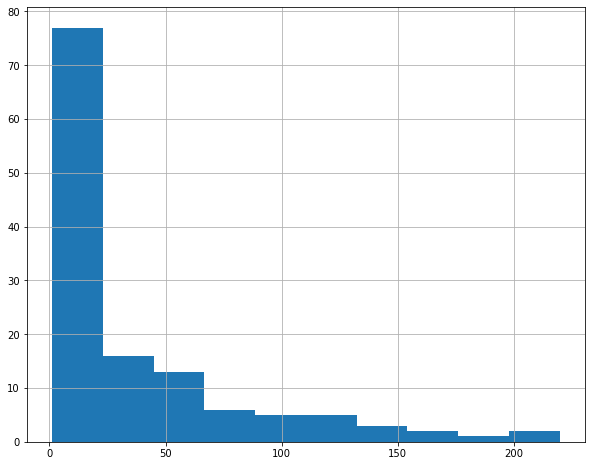

In [8]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption.co2_emission.hist()
plt.show()

- Use .agg() to calculate the mean and median of co2_emission for rice.

In [9]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.agg([np.mean, np.median]))

        consumption  co2_emission
mean      29.375154     37.591615
median    11.875000     15.200000


Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?

> Answer: Median

### Measures of spread


> **Quartiles, quantiles, and quintiles**

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

In [25]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 5)))

[   0.        5.21     16.53     62.5975 1712.    ]


In [26]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [27]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 10)))

[0.00000000e+00 9.05555556e-01 4.19111111e+00 8.05333333e+00
 1.32000000e+01 2.10944444e+01 3.58666667e+01 7.90622222e+01
 1.86115556e+02 1.71200000e+03]


Those are some high-quality quantiles! While calculating more quantiles gives you a more detailed look at the data, it also produces more numbers, making the summary more difficult to quickly understand.

> **Variance and standard deviation**

Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

Both pandas as pd and numpy as np are loaded, and food_consumption is available.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


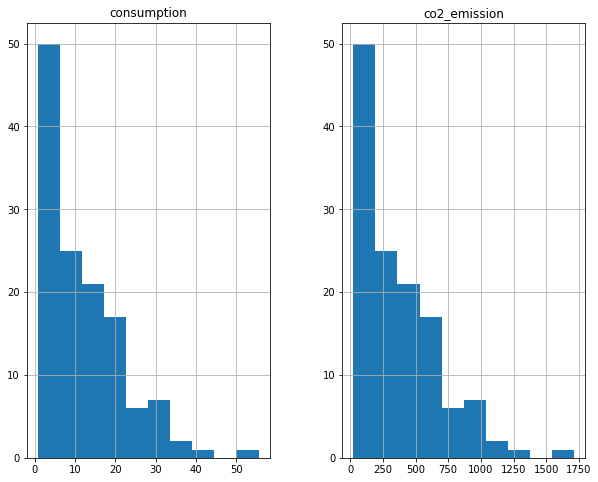

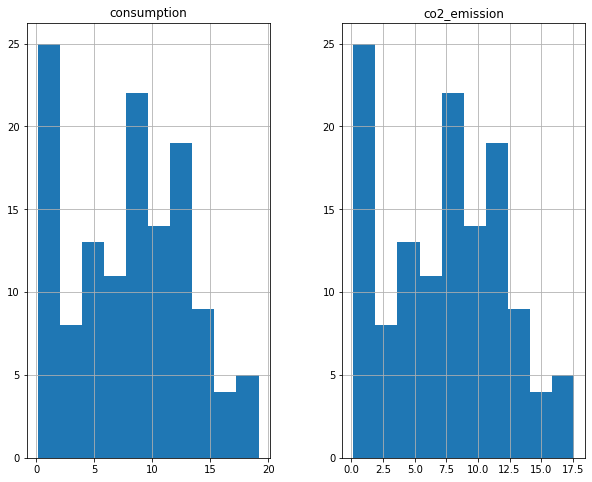

In [24]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category']=='beef'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category']=='eggs'].hist()
# Show plot
plt.show()

Beef has the largest amount of variation in its CO2 emissions, while eggs have a relatively small amount of variation.

> **Finding outliers using IQR**

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than $Q1−1.5×IQR$ or greater than $Q3+1.5×IQR$, it's considered an outlier. <br>

![iqr](images/iqr.png)

<br>

In this exercise, you'll calculate IQR and use it to find some outliers.

In [28]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [36]:
display(emissions_by_country.sort_values())

country
Mozambique      141.40
Rwanda          181.63
Togo            188.09
Liberia         203.38
Malawi          207.94
                ...   
Iceland        1731.36
New Zealand    1750.95
Albania        1777.85
Australia      1938.66
Argentina      2172.40
Name: co2_emission, Length: 130, dtype: float64

In [35]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper) | (emissions_by_country < lower)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


Outstanding outlier detection! It looks like Argentina has a substantially higher amount of CO2 emissions per person than other countries in the world.

## Random Numbers and Probability

> In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, you’ll use the binomial distribution to model events with binary outcomes.

### What are the chances?

- Measuring chance

What's the probability of an event?
$$ P(\text{event}) = \frac{\text{\# ways event can happen}}{\text{total \# of possible outcomes}} $$

> **With or without replacement?**

For each scenario, decide whether it's sampling with replacement or sampling without replacement.

![](./images/with_without_replacement.png)

Correctly identifying the type of sampling that needs to be used is key to calculating accurate probabilities. With replacement, everyone always has a 5% chance of working on the weekend. Without replacement, the second pick has a 4/19 chance, and the third pick has a 3/18 chance of working on the weekend.

> **Calculating probabilities**

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

$$ P(\text{event}) = \frac{\text{\# ways event can happen}}{\text{total \# of possible outcomes}} $$

In [37]:
amir_deals = pd.read_csv('./datasets/amir_deals.csv', index_col=0)
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [40]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [41]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / len(amir_deals['product'])
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

> Ans: 8.43%

> **Sampling deals**

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

Instructions: <br>

- Set the random seed to 24.
- Take a sample of 5 deals without replacement and store them as sample_without_replacement.

In [38]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11


- Take a sample of 5 deals with replacement and save as sample_with_replacement.

In [39]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
163  Product D  Current    Won  6755.66         59
132  Product B  Current    Won  6872.29         25
88   Product C  Current    Won  3579.63          3
146  Product A  Current    Won  4682.94         63
146  Product A  Current    Won  4682.94         63


What type of sampling is better to use for this situation?

> Answers: Without replacement

It's important to consider how you'll take a sample since there's no one-size-fits-all way to sample, and this can have an effect on your results.

### Discrete distributions


> **Creating a probability distribution**

A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The restaurant_groups data is available. pandas is loaded as pd, numpy is loaded as np, and matplotlib.pyplot is loaded as plt.

Instructions: <br>

- Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. Remember to show the plot.

In [43]:
restaurant_groups = pd.read_csv('./datasets/restaurant_groups.csv')
restaurant_groups.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


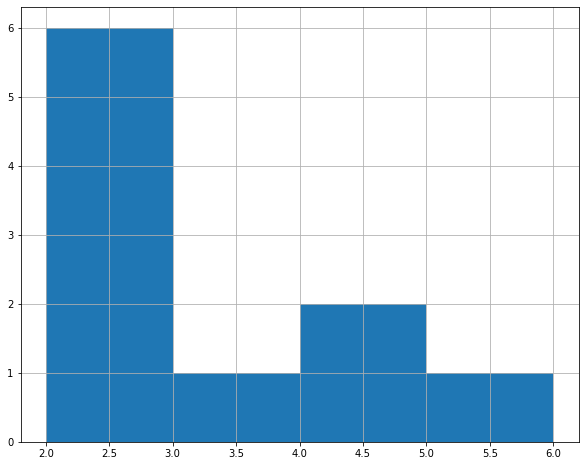

In [44]:
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

- Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.
- Reset the index of size_dist.
- Rename the columns of size_dist to group_size and prob.


In [45]:
size_dist = restaurant_groups['group_size'] / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           0   0.2
1           1   0.4
2           2   0.6
3           3   0.2
4           4   0.2
5           5   0.2
6           6   0.3
7           7   0.2
8           8   0.4
9           9   0.2


- Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.


In [46]:
# Calculate expected value
expected_value = (size_dist['group_size'] * size_dist['prob']).sum()
print(expected_value)

12.200000000000001



- Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

In [47]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.30000000000000004


> **Identifying distributions**


Which sample is most likely to have been taken from a uniform distribution?

![](./images/distributions.png)

<br>
- A: bell-shaped distribution, 
- B: relatively flat distribution, 
- C: lots of lower values, fewer high values

**Ans: B** <br>


Since the histogram depicts a sample and not the actual probability distribution, each outcome won't happen the exact same number of times due to randomness, but they're similar in number.




> **Expected value vs. sample mean**

The app to the right will take a sample from a discrete uniform distribution, which includes the numbers 1 through 9, and calculate the sample's mean. You can adjust the size of the sample using the slider. Note that the expected value of this distribution is 5.

A sample is taken, and you win twenty dollars if the sample's mean is less than 4. There's a catch: you get to pick the sample's size.

Which sample size is most likely to win you the twenty dollars?

- **10**
- 100
- 1000
- 5000
- 10000

Ans: **10**. Since the sample mean will likely be closer to 5 (the expected value) with larger sample sizes, you have a better chance of getting a sample mean further away from 5 with a smaller sample.

### Continuous distributions


> **Which distribution?**


> **Data back-ups**

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

Instructions: <br>

1. To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.
2. Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.
3. Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.
4. Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called prob_between_10_and_20.


In [1]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


> **Simulating wait times**

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

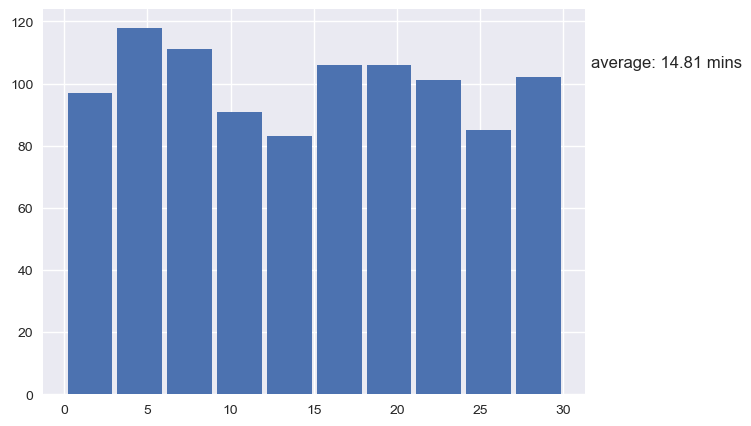

In [45]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from cProfile import label
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times, rwidth=0.9)
plt.text(1.01, 0.85, f'average: {np.mean(wait_times):.2f} mins', 
         fontsize=12, transform=plt.gca().transAxes)

plt.show()

### The binomial distribution


> **Simulating sales deals**

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.


In [49]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

np.random.seed(10)
# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

np.random.seed(10)
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

[1]
[1]
0.8269230769230769


> **Calculating binomial probabilities**

ust as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

binom is imported from scipy.stats.


In [51]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

"""Amir has about a 22% chance of closing more than one deal in a week."""

0.026999999999999996
0.784
0.21599999999999997


'Amir has about a 22% chance of closing more than one deal in a week.'

> **How many sales will be won?**

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by $n \times p$.

Instructions:<br>

- Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [52]:
# Expected number won with 30% win rate
won_30pct = 0.3 * 3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 0.25 * 3
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 0.35 * 3
print(won_35pct)

"""Excellent expectation experimentation! If Amir's win rate goes up by 5%, he can expect to close more than 1 deal on average each week."""

0.8999999999999999
0.75
1.0499999999999998


## More Distributions and the Central Limit Theorem

> It’s time to explore one of the most important probability distributions in statistics, normal distribution. You’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding your knowledge of statistical functions by adding the Poisson, exponential, and t-distributions to your repertoire.

### The normal distribution

> **Distribution of Amir's sales**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

In [3]:
amir_deals = pd.read_csv('./datasets/amir_deals.csv', index_col=0)

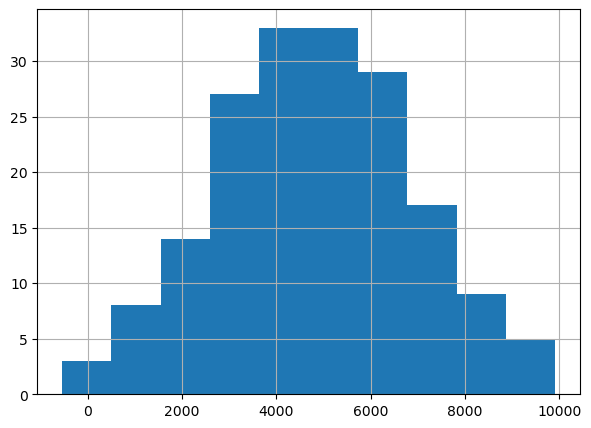

' the sales amounts most closely follows the Normal probability distribution '

In [14]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist( bins=10)
plt.show()
""" the sales amounts most closely follows the Normal probability distribution """

> **Probabilities from the normal distribution**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.


In [18]:
from scipy.stats import norm
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000,2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000,2000) - norm.cdf(3000,5000,2000)

print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25,5000,2000)

print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


> **Simulating sales under new market conditions**

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

In addition, norm from scipy.stats, pandas as pd, and matplotlib.pyplot as plt are loaded.

Instructions:<br>

- Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean.
- Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.
- Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.
- Plot the distribution of the new_sales amounts using a histogram and show the plot.

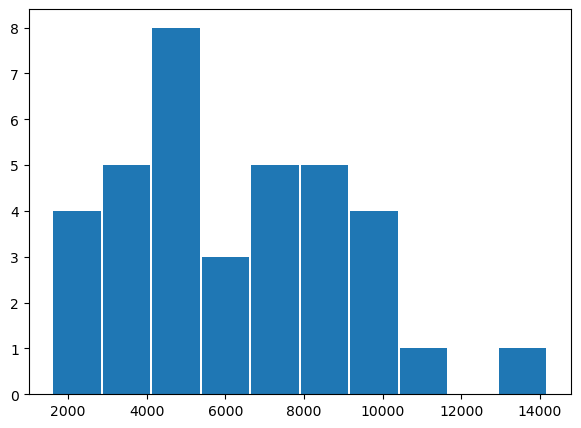

" Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones. In the next exercise, you'll explore the effects of higher variation."

In [25]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales, rwidth=0.96)
plt.show()

""" Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones. In the next exercise, you'll explore the effects of higher variation."""

> **Which market is better?**

The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of $5000 and a standard deviation of $2000, and Amir's predicted amounts in next quarter's market have a mean of $6000 and a standard deviation of $2600.

Based only on the metric of percent of sales over $1000, does Amir perform better in the current market or the predicted market?

In [26]:

cur_market_sales_over_1000 = 1 - norm.cdf(1000,5000,2000)
print(cur_market_sales_over_1000)

predicted_market_sales_over_1000 = 1 - norm.cdf(1000,6000,2600)
print(predicted_market_sales_over_1000)

""" In the current market, Amir makes sales over $1000 about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market, so your company may want to consider other metrics as well."""

0.9772498680518208
0.9727648049862613


" In the current market, Amir makes sales over $1000 about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market, so your company may want to consider other metrics as well."

### The central limit theorem


> **Visualizing sampling distributions**

try creating sampling distributions of different summary statistics from samples of different distributions. Which distribution does the central limit theorem not apply to?


- Discrete uniform distribution

- Continuous uniform distribution

- Binomial distribution

- All of the above

- **None of the above**

*Regardless of the shape of the distribution you're taking sample means from, the central limit theorem will apply if the sampling distribution contains enough sample means.*

> **The CLT in action**

The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.

pandas as pd, numpy as np, and matplotlib.pyplot as plt are loaded and amir_deals is available.

Instructions:<br>

- Create a histogram of the num_users column of amir_deals and show the plot.

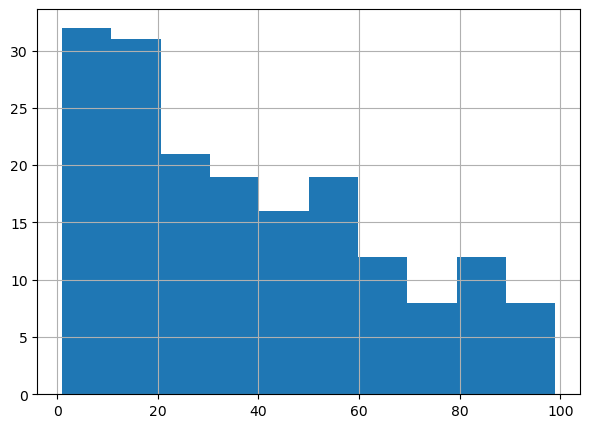

In [27]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

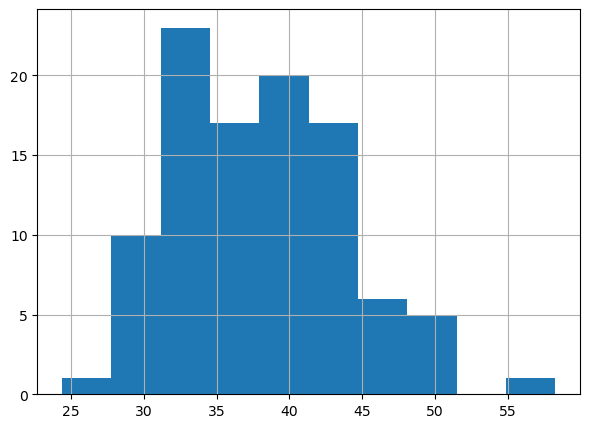

In [29]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

> **The mean of means**

You want to know what the average number of users (num_users) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

In [30]:
all_deals = pd.read_csv('./datasets/all_deals.csv', index_col=0)
all_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10548 entries, 0 to 10547
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  10548 non-null  int64
 1   product     10548 non-null  int64
 2   num_users   10548 non-null  int64
dtypes: int64(3)
memory usage: 329.6 KB


In [32]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))
""" Amir's average number of users is very close to the overall average, so it looks like he's meeting expectations. Make sure to note this in his performance review! """

38.31333333333332
37.651685393258425


" Amir's average number of users is very close to the overall average, so it looks like he's meeting expectations. Make sure to note this in his performance review! "

### The Poisson distribution


> **Identifying lambda**
Now that you've learned about the Poisson distribution, you know that its shape is described by a value called lambda. In this exercise, you'll match histograms to lambda values.

Instructions:<br>

Match each Poisson distribution to its lambda value.

Ans: <br>

![](./images/identify_lambda.png)

 The Poisson distribution is a family of distributions, just like the uniform, binomial, or normal distributions.

> **Tracking lead responses**

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

Instructions: <br>

- Import poisson from scipy.stats and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.
- Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?
- What's the probability that Amir responds to 2 or fewer leads in a day?
- What's the probability that Amir responds to more than 10 leads in a day?

In [34]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

0.1562934518505317


In [35]:
# Probability of 5 responses
prob_coworker =poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


In [36]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)


print(prob_2_or_less)

0.23810330555354436


In [37]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)

print(prob_over_10)

0.0028397661205137315


Note that if you provide poisson.pmf() or poisson.cdf() with a non-integer, it throws an error since the Poisson distribution only applies to integers.

### More probability distributions


> **Distribution dragging and dropping**

By this point, you've learned about so many different probability distributions that it can be difficult to remember which is which. In this exercise, you'll practice distinguishing between distributions and identifying the distribution that best matches different scenarios.

![](./images/distributions2.png)

> **Modeling time between leads**

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

Instructions:<br>

- Import expon from scipy.stats. What's the probability it takes Amir less than an hour to respond to a lead?
- What's the probability it takes Amir more than 4 hours to respond to a lead?
- What's the probability it takes Amir 3-4 hours to respond to a lead?

In [39]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

# Print probability response takes > 4 hours
print(1 - expon.cdf(4,scale=2.5))

# Print probability response takes 3-4 hours
print(expon.cdf(4,scale=2.5) - expon.cdf(3,scale=2.5))

"""There's only about a 20% chance it will take Amir more than 4 hours to respond, so he's pretty speedy in his responses."""

0.3296799539643607
0.20189651799465536
0.09929769391754684


"There's only about a 20% chance it will take Amir more than 4 hours to respond, so he's pretty speedy in his responses."

> **The t-distribution**

Which statement is not true regarding the t-distribution?


Possible Answers

- The t-distribution has thicker tails than the normal distribution.
- A t-distribution with high degrees of freedom resembles the normal distribution.
- The number of degrees of freedom affects the distribution's variance.
- **The t-distribution is skewed.**

## Correlation and Experimental Design

> In this chapter, you'll learn how to quantify the strength of a linear relationship between two variables, and explore how confounding variables can affect the relationship between two other variables. You'll also see how a study’s design can influence its results, change how the data should be analyzed, and potentially affect the reliability of your conclusions.

### Correlation


> **Guess the correlation**

On the right, use the scatterplot to estimate what the correlation is between the variables x and y. Once you've guessed it correctly, use the New Plot button to try out a few more scatterplots. When you're ready, answer the question below to continue to the next exercise.

Which of the following statements is NOT true about correlation?

Instructions: <br>

- If the correlation between x and y has a high magnitude, the data points will be clustered closely around a line.
- Correlation can be written as r.
- If x and y are negatively correlated, values of y decrease as values of x increase.
- **Correlation cannot be 0.**

*When correlation is 0, that means there is no relationship between two variables and the points appear to be randomly scattered.*

> **Relationships between variables**

In this chapter, you'll be working with a dataset world_happiness containing results from the 2019 [World Happiness Report](https://worldhappiness.report/ed/2019/). The report scores various countries based on how happy people in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

In this exercise, you'll examine the relationship between a country's life expectancy (life_exp) and happiness score (happiness_score) both visually and quantitatively. seaborn as sns, matplotlib.pyplot as plt, and pandas as pd are loaded and world_happiness is available.

In [42]:
import seaborn as sns
world_happiness = pd.read_csv('./datasets/world_happiness.csv', index_col=0)
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1 to 143
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 10.1+ KB


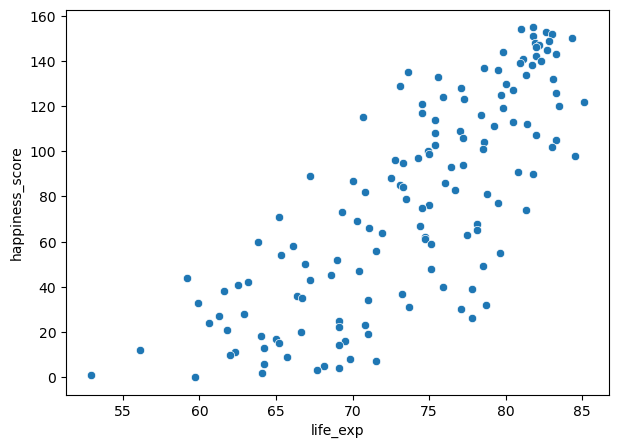

In [43]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Show plot
plt.show()

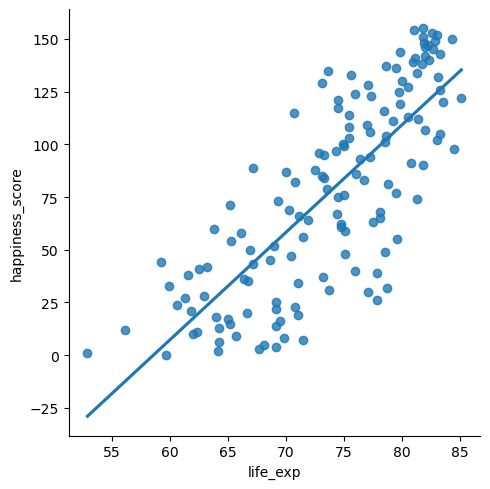

0.7802249053272062


In [45]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

Based on the scatterplot, which is most likely the correlation between life_exp and happiness_score? <br>

*Ans: 0.8*

### Correlation caveats


> **What can't correlation measure?**

While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect. In this exercise, you'll explore one of the caveats of the correlation coefficient by examining the relationship between a country's GDP per capita (gdp_per_cap) and happiness score.

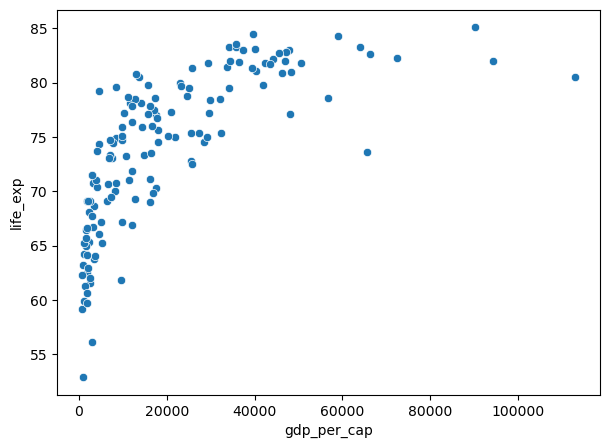

0.7019547642148012


In [46]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()
  
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

The correlation between GDP per capita and life expectancy is 0.7. Why is correlation not the best way to measure the relationship between these two variables?

Possible Answers: <br>

- Correlation measures how one variable affects another.

- **Correlation only measures linear relationships.**

- Correlation cannot properly measure relationships between numeric variables.

> **Transforming variables**

When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. In this exercise, you'll perform a transformation yourself.

pandas as pd, numpy as np, matplotlib.pyplot as plt, and seaborn as sns are imported, and world_happiness is loaded.

Instructions:<br>

- Create a scatterplot of happiness_score versus gdp_per_cap and calculate the correlation between them.
- Add a new column to world_happiness called log_gdp_per_cap that contains the log of gdp_per_cap.
- Create a seaborn scatterplot of log_gdp_per_cap and happiness_score and calculate the correlation between them.

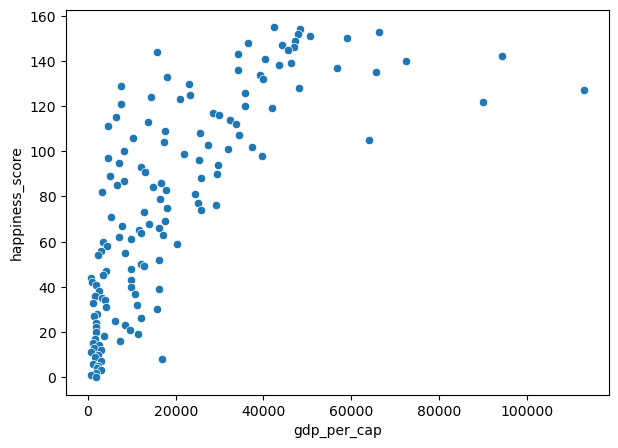

0.727973301222298


In [47]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

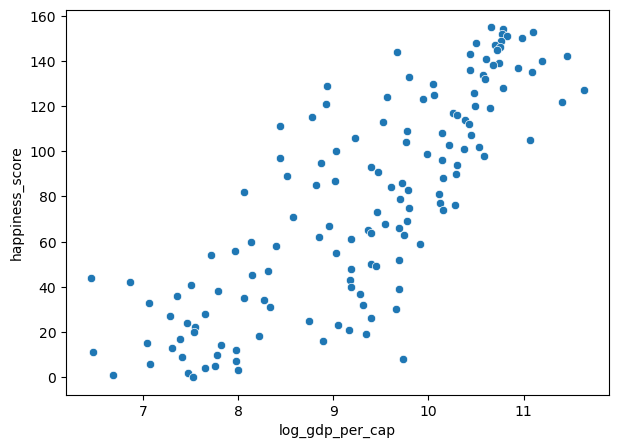

0.8043146004918288


'The relationship between GDP per capita and happiness became more linear by applying a log transformation. Log transformations are great to use on variables with a skewed distribution, such as GDP.'

In [51]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

"""The relationship between GDP per capita and happiness became more linear by applying a log transformation. Log transformations are great to use on variables with a skewed distribution, such as GDP."""

> **Does sugar improve happiness?**

A new column has been added to world_happiness called grams_sugar_per_day, which contains the average amount of sugar eaten per person per day in each country. In this exercise, you'll examine the effect of a country's average sugar consumption on its happiness score.

pandas as pd, matplotlib.pyplot as plt, and seaborn as sns are imported, and world_happiness is loaded.


Question: Based on this data, which statement about sugar consumption and happiness scores is true?

Possible Answers: <br>

- Increased sugar consumption leads to a higher happiness score.
- Lower sugar consumption results in a lower happiness score
- Increased sugar consumption is associated with a higher happiness score.
- Sugar consumption is not related to happiness.

In [55]:
import seaborn as sns
world_happiness = pd.read_csv('./datasets/world_happiness_add_sugar.csv', index_col=0)
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           133 non-null    int64  
 1   country              133 non-null    object 
 2   social_support       133 non-null    int64  
 3   freedom              133 non-null    int64  
 4   corruption           127 non-null    float64
 5   generosity           133 non-null    int64  
 6   gdp_per_cap          133 non-null    int64  
 7   life_exp             133 non-null    float64
 8   happiness_score      133 non-null    int64  
 9   grams_sugar_per_day  133 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 11.4+ KB


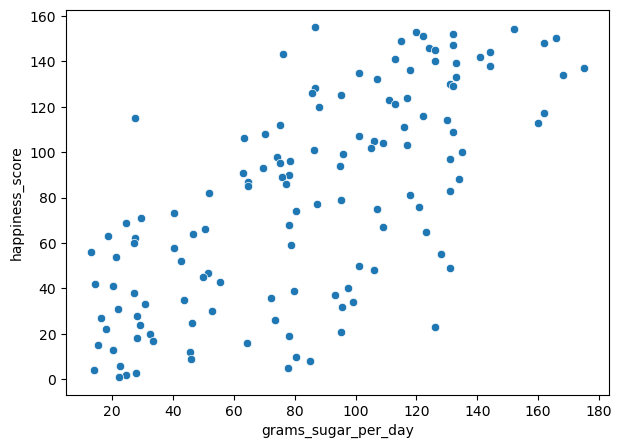

0.6939100021829633


In [56]:
# Scatterplot of grams_sugar_per_day and happiness_score
sns.scatterplot(x='grams_sugar_per_day', y='happiness_score', data=world_happiness)
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor = world_happiness['grams_sugar_per_day'].corr(world_happiness['happiness_score'])
print(cor)

> **Confounders**

A study is investigating the relationship between neighborhood residence and lung capacity. Researchers measure the lung capacity of thirty people from neighborhood A, which is located near a highway, and thirty people from neighborhood B, which is not near a highway. Both groups have similar smoking habits and a similar gender breakdown.

Which of the following could be a confounder in this study?

Possible Answers: <br>

- Lung capacity
- Neighborhood
- **Air pollution**
- Smoking status
- Gender

### Design of experiments


> **Study types**

![](./images/study_types.png)


> **Longitudinal vs. cross-sectional studies**

Longitudinal vs. cross-sectional studies
A company manufactures thermometers, and they want to study the relationship between a thermometer's age and its accuracy. To do this, they take a sample of 100 different thermometers of different ages and test how accurate they are. Is this data longitudinal or cross-sectional?


Possible Answers: <br>

- Longitudinal
- **Cross-sectional**
- Both
- Neither

*This is a cross-sectional study since researchers aren't following the same set of thermometers over time and repeatedly measuring their accuracy at different ages.*